<a href="https://colab.research.google.com/github/estefaniabrito/SYS/blob/main/Copia_de_Parcial1_SyS_2024_2_Estefania_Ramirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.


## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - sede Manizales
##Presentado por: Estefania Ramnirez Brito

# Instrucciones

-- Para recibir el crédito total, sus respuestas deben estar justificadas de manera clara, detallada y concreta, mostrando los procedimientos y razonamientos paso a paso.

-- Está permitido el uso de herramientas de inteligencia artificial (IA). Si las utiliza, por favor declare explícitamente cómo fueron empleadas en la resolución de cada pregunta. Incluya los prompts (consultas) y las iteraciones realizadas con las IA durante el desarrollo del parcial.

-- La entrega del parcial debe realizarse antes de las 23:59 del 5 de diciembre de 2024 al correo electrónico amalvarezme@unal.edu.co mediante un enlace de GitHub.

-- Los códigos deben estar debidamente comentados en las celdas correspondientes y explicados en celdas de texto (markdown). Los códigos que no incluyan comentarios ni discusiones no serán considerados en la evaluación final.

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

Se seguirán los pasos teniendo en cuenta lo analizado y realizado durante las clases.
Iniciemos imoportando las librerías necesarias para este primer punto, nececitamos la librería numpy la cual nos ayuda con el procesamiento de datos numéricos y también usaremos matplotlib.pyplot ya que nos ayudaráa pintar señales en 2D.

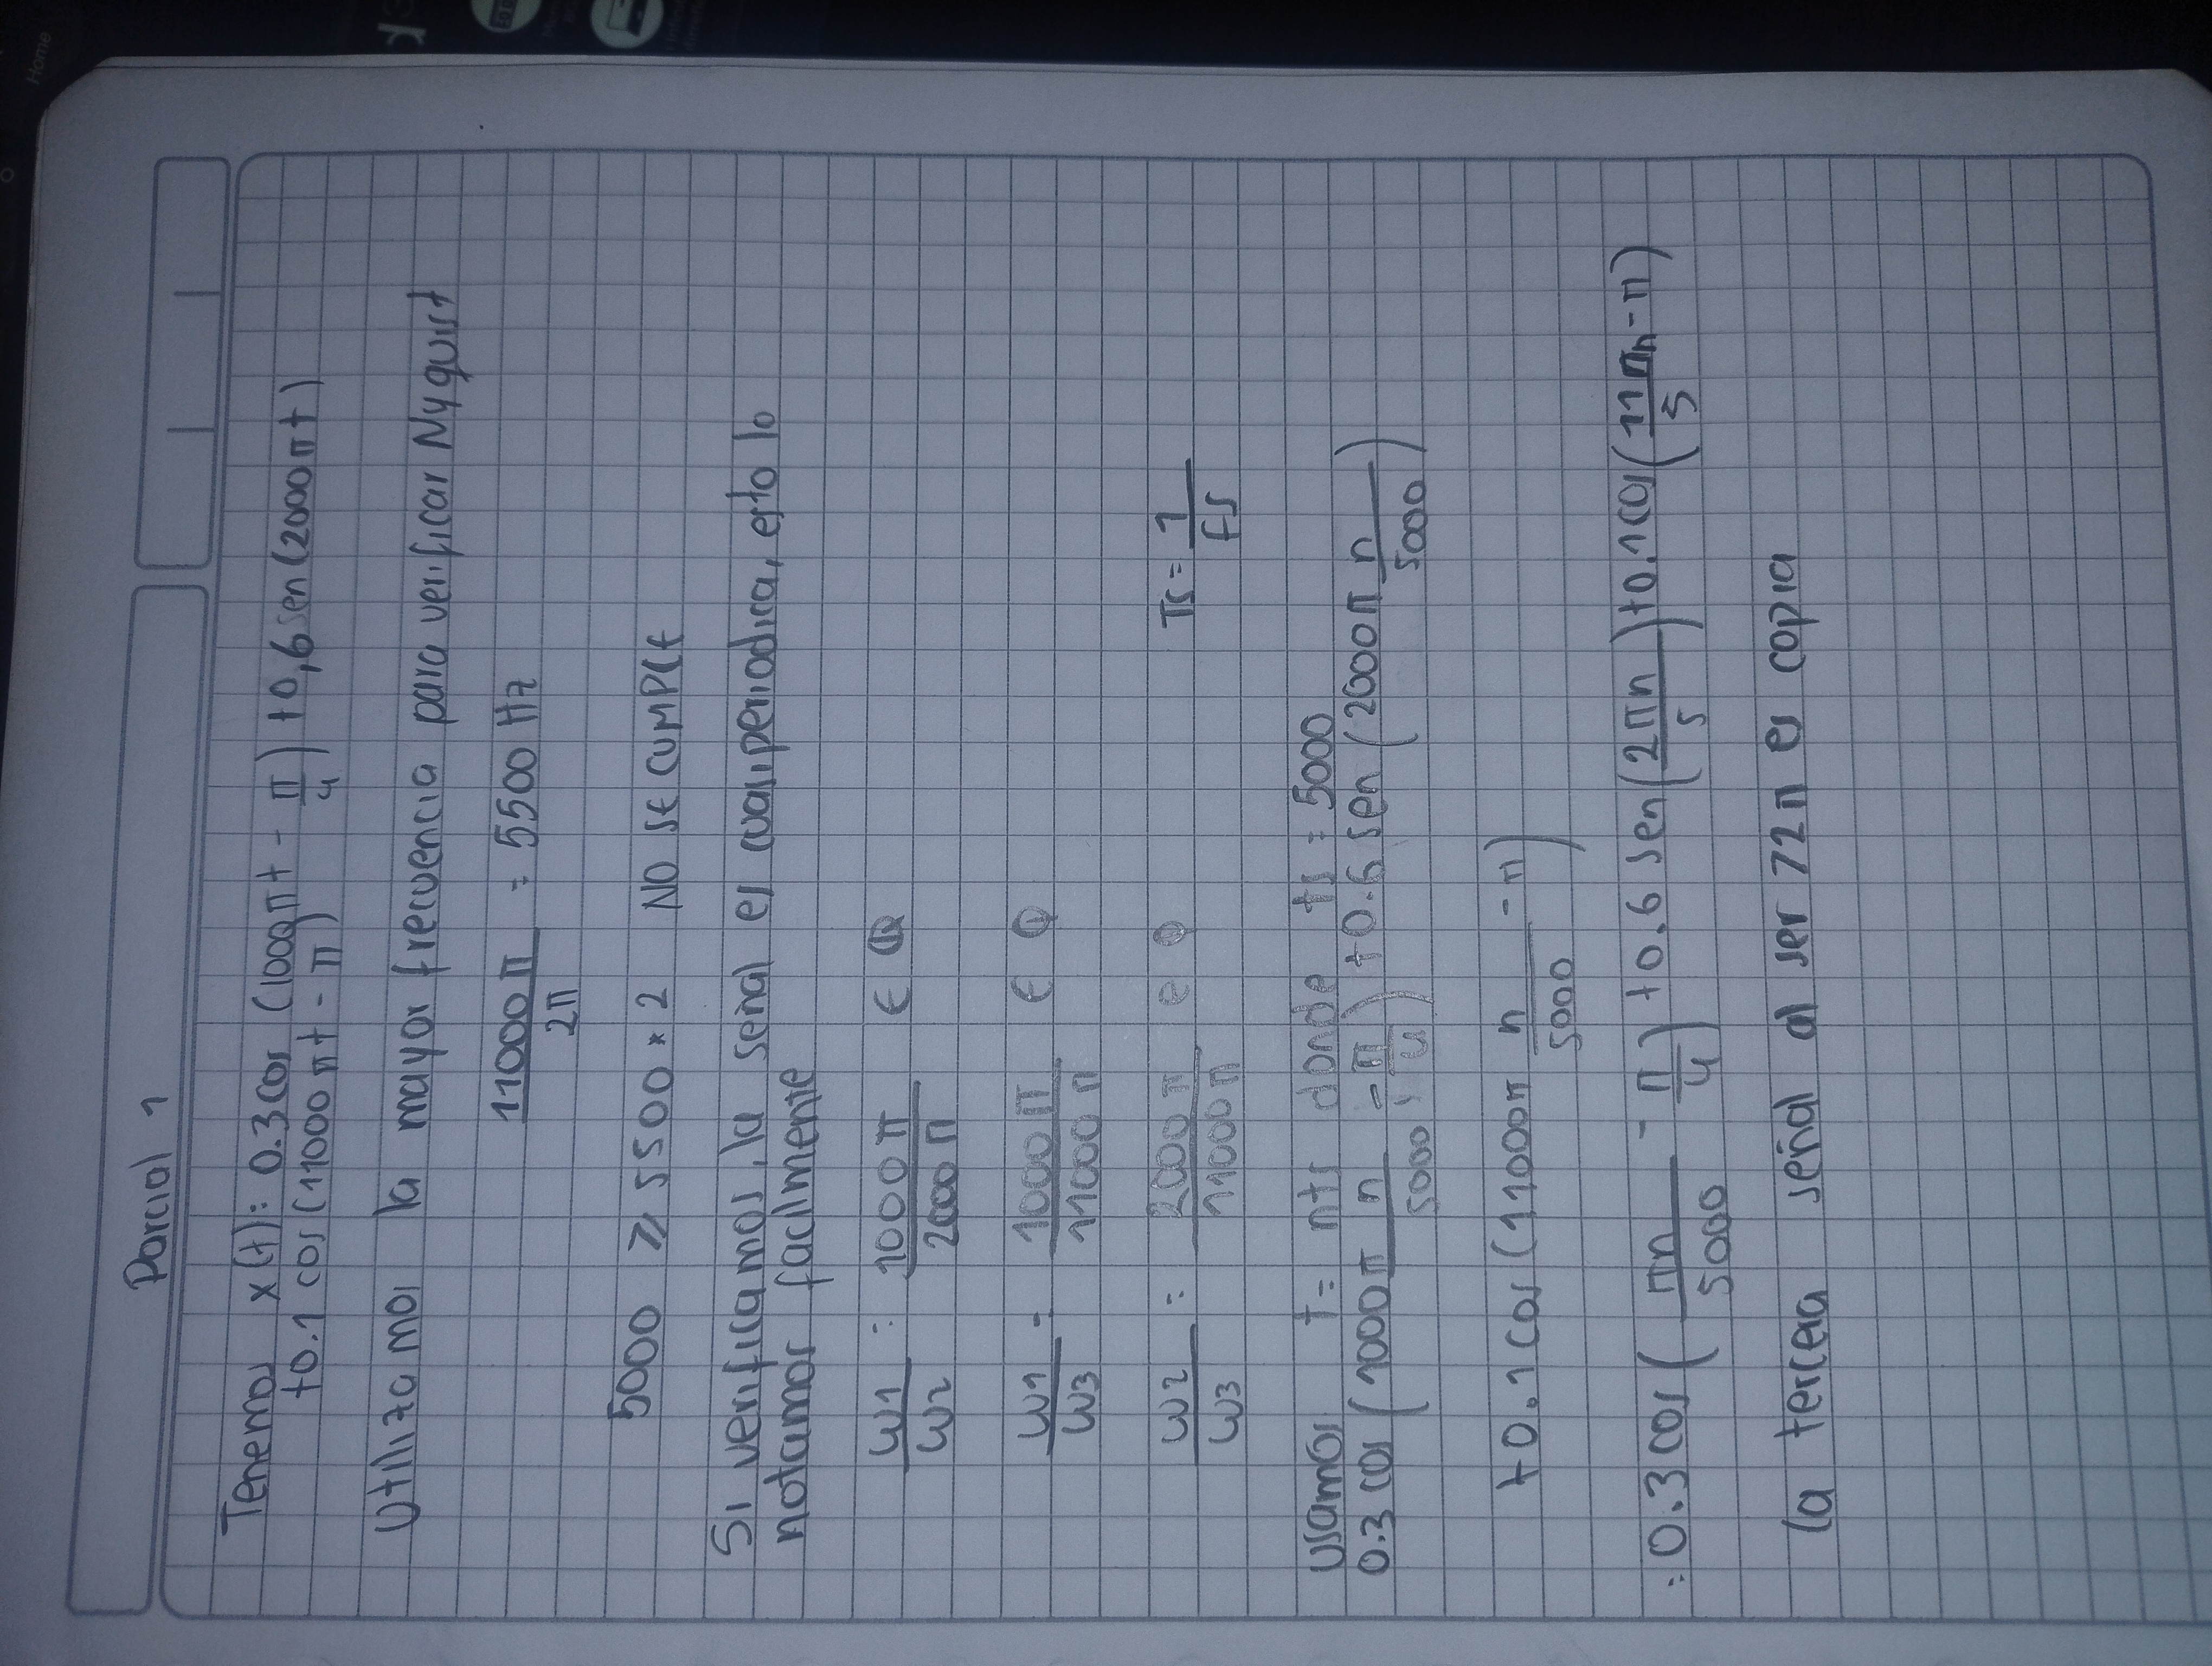

In [ ]:
#Iniciamos importando las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
#Definimos los parametros que vamos a utilizar
A1 = 0.3
A2 = 0.6
A3 = 0.1
#Donde A hace referencia a las amplitudes

w1=1000*np.pi
w2=2000*np.pi
w3=11000*np.pi

#donde w hace referencia a las velocidades angulares
phi1 = -np.pi/4 #fase 1
phi2 = 0 #fase 2
phi3 = -np.pi # fase3

# ahora definimos las frecuencias y los periodos
F1 = (w1/(2*np.pi)) #frecuencia 1
F2 = (w2/(2*np.pi)) #frecuencia 2
F3 = (w3/(2*np.pi)) #frecuencia 3

T1 = 1/F1
T2 = 1/F2
T3 = 1/F3
#Donde T representa el periodo


T = (1/500) # Periodo de la señal cuasiperiodica

Fs=5*max(F1,F2,F3) #Frecuencia de muestreo
Ts=1/Fs #Periodo de muestreo
ti=0 #vector de tiempo, el cual iniciará en 0
tf=3*T #los 3 ciclos o periodos que pide el ejercicio
tv=np.arange(ti,tf,Ts)

#Procedemos a programar nuestra señal
x=A1*np.cos(w1*tv+phi1)+A2*np.sin(w2*tv)+A3*np.cos(w3*tv+phi3)
x1=A1*np.cos(w1*tv+phi1)
x2=A2*np.sin(w2*tv)
x3=A3*np.cos(w3*tv+phi3)
plt.figure(figsize=(12, 8)) #nos permite crear una figura de 12*8
plt.plot(tv,x,label='Señal continua')
plt.plot(tv,x1,label='Señal 1')
plt.plot(tv,x2,label='Señal 2')
plt.plot(tv,x3,label='Señal 3')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()





In [ ]:
#Vamos a reutilizar las funciones que se han planteado en clases anteriores, en este caso usaremos la funcion para cero y pendiente y para cuantizar
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x, ymin, ymax)
plt.plot(tv,xcp,'b',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [ ]:
nbits=5 #numero de bits que se especifican en el ejercicio
n=2**nbits #numero de estados de cuatificación
vq=np.linspace(ymin,ymax,n) #vector de cuantización
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia minima
  return vq[ind]
#recorremos el vector programado para poder cuantizar
for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0
#Después, procedemos a pintar
plt.plot(tv,yq,'r',label='cuantización')
plt.stem(tv,xcp,"b", label= "Discreta)")
for v in vq:
  plt.plot(tv,np.ones(len(tv))*v,'k--')
plt.plot(tv,yq,"g",marker="o")
plt.legend()
plt.grid()
plt.show()

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()



Para ver si el sistema varia o no vamos a poner dos funciones cualquiera y vamos a verificar si la salida para la suma de estas señales es igual a la suma de las salidas individuales.

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt #importamos las librerías que necesitamos para el desarrollo del punto
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

# Inicializar el sistema
my_system = system_.My_System() #"""My_system según el archivo comprimido tiene lo siguienteimport numpy as np
#import matplotlib.pyplot as plt
#from scipy.signal import firwin, freqz, lfilter, filtfilt

#class My_System():
   # def __init__(self, fs=1000, cutoff=100, numtaps = 10):
    #    self.fs = fs
     #   self.cutoff = 100
     #   self.numtaps = numtaps
   # def create_(self):
    # Diseño del filtro FIR pasa baja
      #  self.fir_coeff = firwin(self.numtaps, self.cutoff, fs=self.fs, pass_zero='lowpass') firwin es una función de la biblioteca scipy.signal que genera los coeficientes del filtro FIR

    #def predict(self,signal): #aplica al filtro una señal de entrada, nos da como salida una señal ya filtrada
      # return lfilter(self.fir_coeff, 1.0, signal)

    #def plot_(self): grafica la respuesta
      # Visualización de la respuesta en frecuencia
      #w, h = freqz(self.fir_coeff, worN=8000, fs=self.fs)
      #plt.figure()
      #plt.plot(w, 20 * np.log10(abs(h)), 'b')
      #plt.title('Respuesta en Frecuencia del Filtro FIR Pasa Baja')
      #plt.xlabel('Frecuencia (Hz)')
      #plt.ylabel('Magnitud (dB)')
     # plt.grid()
      #plt.show(), My system es una clase la cuela internamente tiene un filtro pasa bajas, utilizado para eliminar frecuencias superiores a un valor especifico """
my_system.create_()
#hacemos:
A=7
B=3
f=60
fs=my_system.fs #Es la frecuencia que gtenemos para las muestras
t = np.arange(-0.01, 0.02, 1/fs)
signal_u = np.heaviside(t,0) #se recuerda que el heavside es el escalón unitario
signal_cos=np.cos(7*np.pi*f*t)
signalsum= A*signal_u+B*signal_cos
y_u = my_system.predict(signal_u)
y_cos=my_system.predict(signal_cos)
y_sum=my_system.predict(signalsum)
sumasal=A*y_u+B*y_cos # suma de las salidas

#Se inicia el proceso para graficar las señales solicitadas
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal_u, label='Señal de entrada')
plt.plot(t, signal_cos, label='Señal de entrada')
plt.title('Señal de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, y_u, label='Señal salida')
plt.plot(t, y_cos, label='Señal salida')
plt.title('Salidas individuales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, y_sum, label='Señal salida')
plt.plot(t, sumasal, label='Señal salida')
plt.title('Salidas combinadas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


**Nota: en el ultimo punto se usó IA especificamente chat gpt, ya que la clase "My system" tenía internamente algunos aspectos de programación desconocidos, adicionalmente la mayoria de celdas, tiene comentado lo que entiendo acerca de lo que hace cada una de sus partes, aquellas que no se encuentran comentadas es por su facilidad de comprensión a simple vista. Por otro lado es importante resaltar que en el ultimo ejercicio traté de hacer lo que se planteaba en clase es decir, sin abrir la caja, mirar si una señal es combinacion lineal y su salida es la suma de estas, por otra parte vemos que es un sistema lineal y que no varia en el tiempo por tanto podemos aplicar lo solicitado.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from P1_model import system_  # Importa la clase My_System correctamente

# Inicializar el sistema
my_system = system_.My_System()  # Crear instancia del sistema
my_system.create_()  # Inicializar el filtro

# Parámetros del sistema
fs = my_system.fs  # Frecuencia de muestreo
n_samples = 50 # Número de muestras
n = np.arange(n_samples)

# Señal x[n] = sin(100πn) + sin(600πn)
signal_x = np.sin(100 * np.pi * n / fs) + np.sin(600 * np.pi * n / fs)

# Aplicar la señal al sistema
output_signal = my_system.predict(signal_x)

# Graficar la señal de entrada y salida
plt.figure(figsize=(12, 6))

# Señal de entrada
plt.subplot(2, 1, 1)
plt.plot(n / fs, signal_x, label='Señal de entrada $x[n]$')
plt.title('Señal de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Señal de salida
plt.subplot(2, 1, 2)
plt.plot(n / fs, output_signal, label='Señal de salida del sistema', color='orange')
plt.title('Señal de salida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Inicializar el sistema
my_system = system_.My_System()  # Crear instancia del sistema
my_system.create_()  # Inicializar el filtro

# Parámetros del sistema
fs = my_system.fs  # Frecuencia de muestreo
n_samples = 50  # Número de muestras (suficientes para observar la respuesta)
delta = np.zeros(n_samples)  # Inicializar señal de impulso
delta[0] = 1  # Definir el impulso unitario (δ[n])

# Aplicar el impulso al sistema
impulse_response = my_system.predict(delta)



# Inicializar el sistema
my_system = system_.My_System()  # Crear instancia del sistema
my_system.create_()  # Inicializar el filtro

# Parámetros del sistema
fs = my_system.fs  # Frecuencia de muestreo
n_samples = 15 # Número de muestras (suficientes para observar la respuesta)
delta = np.zeros(n_samples)  # Inicializar señal de impulso
delta[0] = 1  # Definir el impulso unitario (δ[n])

# Aplicar el impulso al sistema
respuesta_impul = my_system.predict(delta)

# Graficar la respuesta al impulso
# Graficar la respuesta al impulso
plt.figure(figsize=(12, 6))
plt.stem(np.arange(n_samples), respuesta_impul)  # Gráfico de tallos
plt.title('Respuesta al Impulso del Sistema')
plt.xlabel('n (muestras)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()



